## Business Understanding

Objective: Menemukan Cluster dari data untuk melihat potensial angkat rate mortality. Hal ini diperlukan untuk menentukan langkah strategis mengurangi / menemukan mortality rate

Pemodelan: Clustering - Unsupervised Learning

## Data Understanding

In [14]:
# Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import googl edrive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
url = '/content/drive/MyDrive/Colab Notebooks/MSIB/Data Mining/DataSource/data_mortality_rate.xlsx'

load_data_ml = pd.read_excel(url)

df = pd.DataFrame(load_data_ml)

df.head()

,Year of Date,Month of Date,Day of Date,Count of Sheet1,Crude Birth Ratio,Crude Death Ratio,HIV Prevalence,Immunization Measless,Infant Mortality Rate,Life expentancy rate,Malaria Prevalence,Maternal Mortality Rate,Nurse Density,Pharmaceutical,Physi density,TB Prevalence,Undernourish Population,Underweight Children,immunization DPT
0,1990,December,31,10,295.2,76.5,1.82,698.0,471.4,674.8,0.0,3281.0,849.62,0.0,849.62,0.0,273.8,280.6,740.0
1,1991,December,31,10,289.1,75.5,2.69,696.0,458.2,678.1,0.0,3093.0,767.07,76.0,767.07,0.0,273.8,243.2,734.0
2,1992,December,31,10,282.9,74.6,3.23,720.0,445.7,681.2,0.0,2908.0,519.69,24.0,519.69,0.0,268.1,214.1,722.0
3,1993,December,31,10,276.3,73.9,3.75,739.0,433.5,683.1,0.0,2787.0,828.39,81.0,828.39,0.0,264.0,225.6,737.0
4,1994,December,31,10,268.6,71.5,4.09,812.0,422.0,687.9,0.0,2631.0,555.81,0.0,555.81,0.0,239.1,183.4,779.0


## Pemodelan Cluster

In [16]:
from sklearn.cluster import KMeans
#from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import MinMaxScaler

In [20]:
# Menentukan input variabel
x = df[['Year of Date',	'Day of Date',	'Count of Sheet1',	'Crude Birth Ratio',	'Crude Death Ratio',	'HIV Prevalence',	'Immunization Measless',	'Infant Mortality Rate',	'Life expentancy rate',	'Malaria Prevalence',	'Maternal Mortality Rate',	'Nurse Density',	'Pharmaceutical',	'Physi density',	'TB Prevalence',	'Undernourish Population',	'Underweight Children',	'immunization DPT']]

# Pada pemodelan Unsupervised Learning tidak ada variabel target

## Elbow Method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

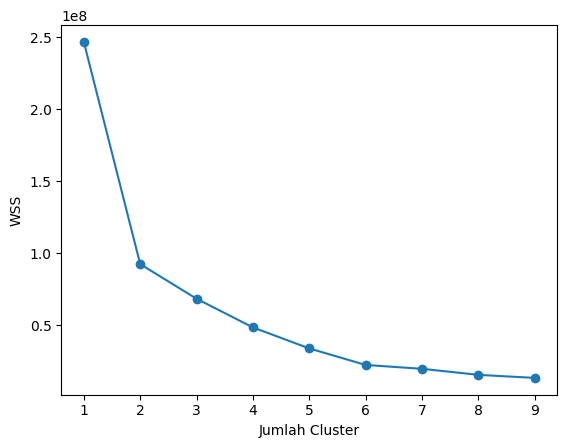

In [21]:
cluster_range = range(1,10)
cluster_wss = []

for num_cluster in cluster_range:
  clusters = KMeans(num_cluster)
  clusters.fit(x)
  cluster_wss.append(clusters.inertia_)

plt.xlabel('Jumlah Cluster')
plt.ylabel('WSS')
plt.plot(cluster_range, cluster_wss, marker='o')
plt.show()

# cluster sekita 3, 4, 5

In [22]:
# Menentukan konfigurasi K-Means pada model
cls = KMeans(n_clusters=3, random_state=0)

# Membentuk model
model_cls = cls.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
df['cluster'] = model_cls.labels_

In [24]:
df.head()

,Year of Date,Month of Date,Day of Date,Count of Sheet1,Crude Birth Ratio,Crude Death Ratio,HIV Prevalence,Immunization Measless,Infant Mortality Rate,Life expentancy rate,Malaria Prevalence,Maternal Mortality Rate,Nurse Density,Pharmaceutical,Physi density,TB Prevalence,Undernourish Population,Underweight Children,immunization DPT,cluster
0,1990,December,31,10,295.2,76.5,1.82,698.0,471.4,674.8,0.0,3281.0,849.62,0.0,849.62,0.0,273.8,280.6,740.0,0
1,1991,December,31,10,289.1,75.5,2.69,696.0,458.2,678.1,0.0,3093.0,767.07,76.0,767.07,0.0,273.8,243.2,734.0,0
2,1992,December,31,10,282.9,74.6,3.23,720.0,445.7,681.2,0.0,2908.0,519.69,24.0,519.69,0.0,268.1,214.1,722.0,0
3,1993,December,31,10,276.3,73.9,3.75,739.0,433.5,683.1,0.0,2787.0,828.39,81.0,828.39,0.0,264.0,225.6,737.0,0
4,1994,December,31,10,268.6,71.5,4.09,812.0,422.0,687.9,0.0,2631.0,555.81,0.0,555.81,0.0,239.1,183.4,779.0,0


In [25]:
# Export to Excel
from google.colab import files

xlsx = df.to_excel('df_cluster_mortality_cluster3.xlsx')
files.download('df_cluster_mortality_cluster3.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>